# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [167]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress
import scipy.stats as st
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [170]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
max_cities=1250
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for index,lat_lng in enumerate(lat_lngs):
    if index > max_cities:
        break;
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        print("Adding city :" + city)
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

Adding city :khatanga
Adding city :vaitupu
Adding city :provideniya
Adding city :dikson
Adding city :saldanha
Adding city :mataura
Adding city :baoqing
Adding city :sidney
Adding city :moba
Adding city :urumqi
Adding city :tiznit
Adding city :johnson city
Adding city :nikolskoye
Adding city :noumea
Adding city :rozivka
Adding city :brownsville
Adding city :nanortalik
Adding city :mar del plata
Adding city :atuona
Adding city :new norfolk
Adding city :samusu
Adding city :vaini
Adding city :hermanus
Adding city :porto belo
Adding city :georgetown
Adding city :palabuhanratu
Adding city :uruzgan
Adding city :kaitangata
Adding city :albany
Adding city :tasiilaq
Adding city :lermontovka
Adding city :yulara
Adding city :palu
Adding city :port shepstone
Adding city :nome
Adding city :tucuma
Adding city :kolokani
Adding city :illoqqortoormiut
Adding city :coihaique
Adding city :kangaatsiaq
Adding city :taolanaro
Adding city :belushya guba
Adding city :rikitea
Adding city :busselton
Adding city 

Adding city :ayagoz
Adding city :nizhneangarsk
Adding city :warrnambool
Adding city :kishi
Adding city :cam ranh
Adding city :birjand
Adding city :vetovo
Adding city :severnoye
Adding city :port hardy
Adding city :trois-rivieres
Adding city :sarkand
Adding city :pandan niog
Adding city :peterhead
Adding city :progreso
Adding city :krutikha
Adding city :guerrero negro
Adding city :mahebourg
Adding city :aviles
Adding city :plouzane
Adding city :ambulu
Adding city :chernaya kholunitsa
Adding city :greensburg
Adding city :tessalit
Adding city :san policarpo
Adding city :te anau
Adding city :ratne
Adding city :ouesso
Adding city :thabazimbi
Adding city :hami
Adding city :mayo
Adding city :ancud
Adding city :nago
Adding city :karaton
Adding city :norman wells
Adding city :whitehorse
Adding city :tuatapere
Adding city :berlevag
Adding city :constitucion
Adding city :suao
Adding city :martapura
Adding city :shafranovo
Adding city :zhucheng
Adding city :porto novo
Adding city :jibuti
Adding ci

550

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#mcity_name = "corcoran"
#owm_api_url = f"http://api.openweathermap.org/data/2.5/weather?q={mcity_name}&units=imperial&appid={weather_api_key}"
#my_weather_json = requests.get(owm_api_url).json()
#pprint(my_weather_json)




{'base': 'stations',
 'clouds': {'all': 86},
 'cod': 200,
 'coord': {'lat': 36.098, 'lon': -119.5604},
 'dt': 1634933016,
 'id': 5339539,
 'main': {'feels_like': 74.64,
          'grnd_level': 1007,
          'humidity': 38,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 75.6,
          'temp_max': 79.27,
          'temp_min': 66.96},
 'name': 'Corcoran',
 'sys': {'country': 'US',
         'id': 2001667,
         'sunrise': 1634911895,
         'sunset': 1634951604,
         'type': 2},
 'timezone': -25200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 261, 'gust': 8.01, 'speed': 7.99}}


,Temperature,Humidity,Pressure,Feels Like,Weather
0,75.6,38,1014,74.64,overcast clouds


In [171]:
temperature=[]
humidity=[]
feels_like=[]
Date=[]
pressure=[]
description=[]
lattitude=[]
longitude=[]
wind_speed=[]
max_temperature=[]
cloud_cover=[]
# for every city we fetch the data using the openweathermap api
# we may receive some exceptions when the city data does not exist
# we record the exception code and message and move on
for index,city_name in enumerate(cities):
    owm_api_url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name}&units=imperial&appid={weather_api_key}"
    my_weather_json = requests.get(owm_api_url).json()
    time.sleep(1.2)
    print("Retrieving Weather for :" + city_name)
    try:
        temperature.append(my_weather_json["main"]["temp"])
    except:
        temperature.append(np.nan)
        cloud_cover.append(np.nan)
        max_temperature.append(np.nan)
        wind_speed.append(np.nan)
        lattitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        feels_like.append(np.nan)
        pressure.append(np.nan)
        pprint(my_weather_json)
        
        my_error = f'Error :  {my_weather_json["cod"]} - {my_weather_json["message"]}'
#        my_error = my_weather_json["message"]
        description.append(my_error)
    else:
        lattitude.append(my_weather_json["coord"]["lat"])
        longitude.append(my_weather_json["coord"]["lon"])
        humidity.append(my_weather_json["main"]["humidity"])
        cloud_cover.append(my_weather_json["clouds"]["all"])
        max_temperature.append(my_weather_json["main"]["temp_max"])
        wind_speed.append(my_weather_json["wind"]["speed"])
        feels_like.append(my_weather_json["main"]["feels_like"])
        pressure.append(my_weather_json["main"]["pressure"])
        description.append(my_weather_json["weather"][0]["description"])
    if index > max_cities:
        break


#print(temperature)    
#print(description)    
city_weather_df = pd.DataFrame({
                            "City":cities , 
                            "Lattitude":lattitude , 
                            "Longitude":longitude , 
                           "Temperature":temperature,
                            "Max Temperature":max_temperature,
                           "Humidity":humidity,
                           "Pressure":pressure,
                           "Cloud Cover":cloud_cover,
                        "Wind Speed":wind_speed,
                           "Feels Like":feels_like,
                           "Weather" : description})

#city_weather_df    
    

Retrieving Weather for :khatanga
Retrieving Weather for :vaitupu
{'cod': '404', 'message': 'city not found'}
Retrieving Weather for :provideniya
Retrieving Weather for :dikson
Retrieving Weather for :saldanha
Retrieving Weather for :mataura
Retrieving Weather for :baoqing
Retrieving Weather for :sidney
Retrieving Weather for :moba
Retrieving Weather for :urumqi
Retrieving Weather for :tiznit
Retrieving Weather for :johnson city
Retrieving Weather for :nikolskoye
Retrieving Weather for :noumea
Retrieving Weather for :rozivka
Retrieving Weather for :brownsville
Retrieving Weather for :nanortalik
Retrieving Weather for :mar del plata
Retrieving Weather for :atuona
Retrieving Weather for :new norfolk
Retrieving Weather for :samusu
{'cod': '404', 'message': 'city not found'}
Retrieving Weather for :vaini
Retrieving Weather for :hermanus
Retrieving Weather for :porto belo
Retrieving Weather for :georgetown
Retrieving Weather for :palabuhanratu
{'cod': '404', 'message': 'city not found'}
Retr

Retrieving Weather for :bima
Retrieving Weather for :amderma
{'cod': '404', 'message': 'city not found'}
Retrieving Weather for :narsaq
Retrieving Weather for :ryotsu
Retrieving Weather for :tuktoyaktuk
Retrieving Weather for :demba
Retrieving Weather for :upernavik
Retrieving Weather for :harlingen
Retrieving Weather for :sinop
Retrieving Weather for :chokurdakh
Retrieving Weather for :ponta do sol
Retrieving Weather for :zyryanka
Retrieving Weather for :saint george
Retrieving Weather for :leo
Retrieving Weather for :namatanai
Retrieving Weather for :kousseri
Retrieving Weather for :chuy
Retrieving Weather for :nizhneyansk
{'cod': '404', 'message': 'city not found'}
Retrieving Weather for :formoso do araguaia
{'cod': '404', 'message': 'city not found'}
Retrieving Weather for :gazojak
Retrieving Weather for :veraval
Retrieving Weather for :pisco
Retrieving Weather for :tierralta
Retrieving Weather for :kushiro
Retrieving Weather for :atamanovka
Retrieving Weather for :dong hoi
Retriev

Retrieving Weather for :suao
{'cod': '404', 'message': 'city not found'}
Retrieving Weather for :martapura
Retrieving Weather for :shafranovo
Retrieving Weather for :zhucheng
Retrieving Weather for :porto novo
Retrieving Weather for :jibuti
Retrieving Weather for :umm lajj
Retrieving Weather for :vao
Retrieving Weather for :ambon
Retrieving Weather for :vardo
Retrieving Weather for :vila
Retrieving Weather for :los llanos de aridane
Retrieving Weather for :ngukurr
{'cod': '404', 'message': 'city not found'}
Retrieving Weather for :paraiso
Retrieving Weather for :aranos
Retrieving Weather for :champasak
Retrieving Weather for :nemuro
Retrieving Weather for :sredec
{'cod': '404', 'message': 'city not found'}
Retrieving Weather for :wuwei
Retrieving Weather for :shelburne
Retrieving Weather for :gat
Retrieving Weather for :shenjiamen
Retrieving Weather for :irtyshskiy
Retrieving Weather for :nara
Retrieving Weather for :jiddah
{'cod': '404', 'message': 'city not found'}
Retrieving Weather

city_weather_df = pd.DataFrame({
                            "City":cities , 
                            "Lattitude":lattitude , 
                            "Longitude":longitude , 
                           "Temperature":temperature,
                            "Max Temperature":max_temperature,
                           "Humidity":humidity,
                           "Pressure":pressure,
                           "Cloud Cover":cloud_cover,
                        "Wind Speed":wind_speed,
                           "Feels Like":feels_like,
                           "Weather" : description})
city_weather_df

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [172]:
city_weather_df.to_csv("City_Weather_Raw.csv")
print(city_weather_df)

             City  Lattitude  Longitude  Temperature  Max Temperature  \
0        khatanga    71.9667   102.5000         1.99             1.99   
1         vaitupu        NaN        NaN          NaN              NaN   
2     provideniya    64.3833  -173.3000        27.52            27.52   
3          dikson    73.5069    80.5464        13.87            13.87   
4        saldanha   -33.0117    17.9442        58.46            58.46   
..            ...        ...        ...          ...              ...   
545  saint-joseph   -21.3667    55.6167        70.66            73.76   
546       pokhara    28.2333    83.9833        65.05            65.05   
547  poplar bluff    36.7570   -90.3929        51.33            56.68   
548        yushan    31.3776   120.9543        67.84            67.89   
549        burica        NaN        NaN          NaN              NaN   

     Humidity  Pressure  Cloud Cover  Wind Speed  Feels Like  \
0        94.0    1002.0         98.0       11.23      -10.6

In [173]:
city_weather_df.describe()

,Lattitude,Longitude,Temperature,Max Temperature,Humidity,Pressure,Cloud Cover,Wind Speed,Feels Like
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,21.089508,20.734841,58.243917,59.027343,73.104331,1012.505906,57.584646,7.940118,56.925236
std,33.567431,93.376657,20.256519,20.307752,18.322202,11.328951,40.472782,5.894783,23.885602
min,-54.800000,-179.166700,-13.470000,-13.470000,16.000000,876.000000,0.000000,0.000000,-22.290000
25%,-6.140500,-65.868275,43.562500,44.662500,62.000000,1010.000000,13.000000,3.285000,39.267500
50%,26.483950,25.918400,60.775000,61.975000,77.000000,1013.000000,75.000000,6.310000,59.490000
75%,48.599500,106.026125,76.502500,76.515000,87.000000,1018.000000,98.000000,11.500000,77.235000
max,78.218600,179.316700,96.940000,96.940000,100.000000,1041.000000,100.000000,34.520000,100.200000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [174]:
# Since we added all cities from our original list there are some with no city foound error
# we eliminate all records where Humidity is null
city_weather_clean_df=city_weather_df[~city_weather_df["Humidity"].isnull() ]

In [175]:
#  check how many were eliminated
city_weather_clean_df.describe

<bound method NDFrame.describe of              City  Lattitude  Longitude  Temperature  Max Temperature  \
0        khatanga    71.9667   102.5000         1.99             1.99   
2     provideniya    64.3833  -173.3000        27.52            27.52   
3          dikson    73.5069    80.5464        13.87            13.87   
4        saldanha   -33.0117    17.9442        58.46            58.46   
5         mataura   -46.1927   168.8643        72.32            72.32   
..            ...        ...        ...          ...              ...   
544         erzin    36.9559    36.2000        52.52            52.52   
545  saint-joseph   -21.3667    55.6167        70.66            73.76   
546       pokhara    28.2333    83.9833        65.05            65.05   
547  poplar bluff    36.7570   -90.3929        51.33            56.68   
548        yushan    31.3776   120.9543        67.84            67.89   

     Humidity  Pressure  Cloud Cover  Wind Speed  Feels Like          Weather  
0        

In [176]:
city_weather_df["City"].count()

550

In [177]:
city_weather_clean_df["City"].count()

508

In [178]:
# We eliminate all records where humidity was higher than 100% and check how many were eliminated

city_weather_clean_df = city_weather_clean_df[city_weather_df["Humidity"] <= 100 ]


<ipython-input-178-0acc9b22b459>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_weather_clean_df = city_weather_clean_df[city_weather_df["Humidity"] <= 100 ]


In [179]:
city_weather_clean_df.describe()

,Lattitude,Longitude,Temperature,Max Temperature,Humidity,Pressure,Cloud Cover,Wind Speed,Feels Like
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000
mean,21.089508,20.734841,58.243917,59.027343,73.104331,1012.505906,57.584646,7.940118,56.925236
std,33.567431,93.376657,20.256519,20.307752,18.322202,11.328951,40.472782,5.894783,23.885602
min,-54.800000,-179.166700,-13.470000,-13.470000,16.000000,876.000000,0.000000,0.000000,-22.290000
25%,-6.140500,-65.868275,43.562500,44.662500,62.000000,1010.000000,13.000000,3.285000,39.267500
50%,26.483950,25.918400,60.775000,61.975000,77.000000,1013.000000,75.000000,6.310000,59.490000
75%,48.599500,106.026125,76.502500,76.515000,87.000000,1018.000000,98.000000,11.500000,77.235000
max,78.218600,179.316700,96.940000,96.940000,100.000000,1041.000000,100.000000,34.520000,100.200000


In [180]:
# we are eliminating any outliers in temperature by removing the records outside 1.5 times the interquartile range
# we calculate the lower and upper bound

all_temp = city_weather_df["Max Temperature"]
quartiles = all_temp.quantile([0.25,0.5,0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
inter_quart_range = upper_quartile-lower_quartile
lower_bound = lower_quartile - (1.5*inter_quart_range)
upper_bound = upper_quartile + (1.5*inter_quart_range)
outliers = all_temp.loc[(all_temp < lower_bound) | (all_temp > upper_bound)]
print(outliers)


#city_weather_df=city_weather_df[city_weather_df["Temperature"] < lower_bound |city_weather_df["Temperature"] > upper_bound]

216   -13.47
229   -10.97
Name: Max Temperature, dtype: float64


In [181]:
#We eliminate rows outside the range
city_weather_clean_df=city_weather_clean_df[(city_weather_clean_df["Max Temperature"] >= lower_bound) & (city_weather_clean_df["Max Temperature"] <= upper_bound)]
city_weather_clean_df.describe()

,Lattitude,Longitude,Temperature,Max Temperature,Humidity,Pressure,Cloud Cover,Wind Speed,Feels Like
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.00000,506.000000,506.000000
mean,20.891146,20.299011,58.522431,59.308953,73.000000,1012.509881,57.44664,7.959842,57.215968
std,33.484612,93.296601,19.804133,19.845622,18.282817,11.351142,40.49156,5.898052,23.476429
min,-54.800000,-179.166700,-1.530000,-1.530000,16.000000,876.000000,0.00000,0.000000,-13.450000
25%,-6.239300,-66.179825,43.800000,44.755000,62.000000,1010.000000,13.00000,3.315000,39.592500
50%,26.352900,25.451700,60.845000,62.150000,77.000000,1013.000000,75.00000,6.400000,59.570000
75%,48.508325,104.809250,76.507500,76.525000,86.000000,1018.000000,98.00000,11.500000,77.245000
max,78.218600,179.316700,96.940000,96.940000,100.000000,1041.000000,100.00000,34.520000,100.200000


In [93]:
# we also delete the outliers based on humidity
all_hum = city_weather_df["Humidity"]
quartiles = all_hum.quantile([0.25,0.5,0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
inter_quart_range = upper_quartile-lower_quartile
lower_bound = lower_quartile - (1.5*inter_quart_range)
upper_bound = upper_quartile + (1.5*inter_quart_range)
outliers = all_hum.loc[(all_hum < lower_bound) | (all_hum > upper_bound)]
print(outliers)
city_weather_clean_df=city_weather_clean_df[(city_weather_clean_df["Humidity"] >= lower_bound) & (city_weather_clean_df["Humidity"] <= upper_bound)]
city_weather_clean_df.describe()

2     43.0
5     44.0
29    43.0
37    22.0
Name: Humidity, dtype: float64


,Lattitude,Longitude,Temperature,Max Temperature,Humidity,Pressure,Cloud Cover,Wind Speed,Feels Like
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,10.147411,-5.145884,59.084474,59.507895,77.105263,1012.052632,62.789474,8.382895,57.891316
std,38.445167,98.397425,19.463269,19.597558,10.329149,9.689636,40.045351,6.024581,22.316173
min,-46.192700,-175.200000,15.640000,15.640000,49.000000,976.000000,0.000000,0.000000,6.210000
25%,-24.373400,-74.175100,46.532500,47.702500,73.000000,1009.000000,21.750000,3.247500,45.615000
50%,5.538000,-15.920700,61.385000,61.665000,80.000000,1013.000000,82.000000,7.170000,60.215000
75%,42.918275,76.979475,76.835000,76.835000,83.000000,1017.000000,99.750000,13.080000,78.157500
max,78.218600,168.864300,81.190000,85.280000,94.000000,1030.000000,100.000000,21.360000,86.670000


In [182]:
city_weather_clean_df["City"].count()

506

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

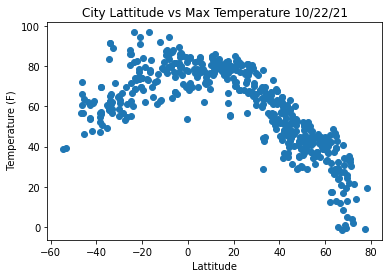

In [183]:
plt.scatter(city_weather_clean_df["Lattitude"],city_weather_clean_df["Max Temperature"] )
plt.xlabel("Lattitude")
plt.ylabel(" Temperature (F)")
plt.title("City Lattitude vs Max Temperature " + time.strftime("%m/%d/%y"))
plt.show()

## Latitude vs. Humidity Plot

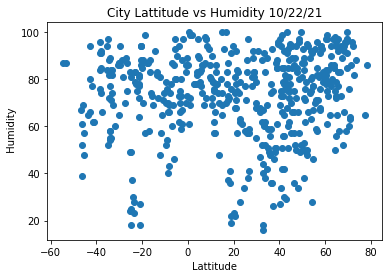

In [184]:
plt.scatter(city_weather_clean_df["Lattitude"],city_weather_clean_df["Humidity"] )
plt.xlabel("Lattitude")
plt.ylabel(" Humidity")
plt.title("City Lattitude vs Humidity " + time.strftime("%m/%d/%y"))
plt.show()

## Latitude vs. Cloudiness Plot

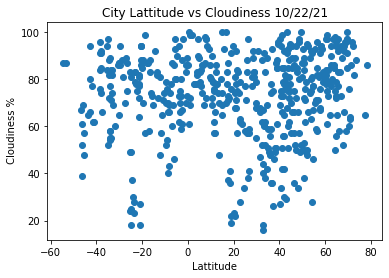

In [185]:
plt.scatter(city_weather_clean_df["Lattitude"],city_weather_clean_df["Humidity"] )
plt.xlabel("Lattitude")
plt.ylabel(" Cloudiness %")
plt.title("City Lattitude vs Cloudiness " + time.strftime("%m/%d/%y"))
plt.show()

## Latitude vs. Wind Speed Plot

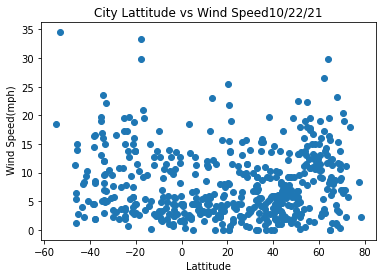

In [186]:
plt.scatter(city_weather_clean_df["Lattitude"],city_weather_clean_df["Wind Speed"] )
plt.xlabel("Lattitude")
plt.ylabel(" Wind Speed(mph)")
plt.title("City Lattitude vs Wind Speed" + time.strftime("%m/%d/%y"))
#          + today.strftime("%B %d, %Y"))
plt.show()

## Linear Regression

In [109]:
 city_weather_clean_df.dtypes

City                object
Lattitude          float64
Longitude          float64
Temperature        float64
Max Temperature    float64
Humidity           float64
Pressure           float64
Cloud Cover        float64
Wind Speed         float64
Feels Like         float64
Weather             object
dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between the Lattitude  and the Max Temperature  is strong : -0.89


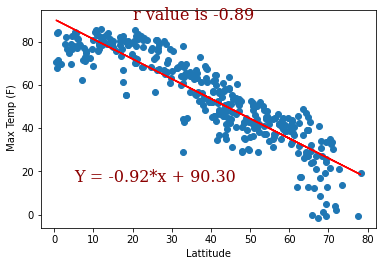

In [187]:
north_hemis_df = city_weather_clean_df[city_weather_clean_df["Lattitude"]>=0]
correlation_w_temp = round(st.pearsonr(north_hemis_df["Lattitude"],north_hemis_df["Max Temperature"])[0],2)
print(f"The correlation between the Lattitude  and the Max Temperature  is strong : {correlation_w_temp}")  
font={"family":"serif","color":"darkred","weight":"normal","size":16,}
model = st.linregress(north_hemis_df["Lattitude"],north_hemis_df["Max Temperature"])
model_y_values = north_hemis_df["Lattitude"] * model[0] +  model[1]
plt.scatter(north_hemis_df["Lattitude"],north_hemis_df["Max Temperature"] )
plt.plot(north_hemis_df["Lattitude"],model_y_values, color="red")
plt.xlabel("Lattitude")
plt.ylabel(" Max Temp (F)")
plt.text(5,15,f"Y = {(model[0]):.2f}*x + {model[1]:.2f}",fontdict=font)
plt.text(20,90,f"r value is {(model[2]):.2f}",fontdict=font)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between the Lattitude  and the Max Temperature  is strong : 0.63


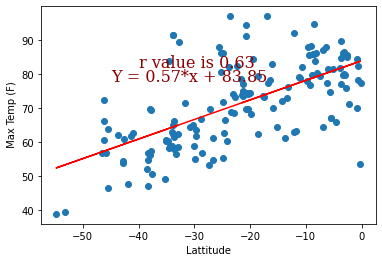

In [189]:
south_hemis_df = city_weather_clean_df[city_weather_clean_df["Lattitude"]<=0]
correlation_w_temp = round(st.pearsonr(south_hemis_df["Lattitude"],south_hemis_df["Max Temperature"])[0],2)
print(f"The correlation between the Lattitude  and the Max Temperature  is strong : {correlation_w_temp}")   
model = st.linregress(south_hemis_df["Lattitude"],south_hemis_df["Max Temperature"])
model_y_values = south_hemis_df["Lattitude"] * model[0] +  model[1]
plt.scatter(south_hemis_df["Lattitude"],south_hemis_df["Max Temperature"] )
plt.plot(south_hemis_df["Lattitude"],model_y_values, color="red")
plt.xlabel("Lattitude")
plt.ylabel(" Max Temp (F)")
plt.text(-45,78,f"Y = {(model[0]):.2f}*x + {model[1]:.2f}",fontdict=font)
plt.text(-40,82,f"r value is {(model[2]):.2f}",fontdict=font)
plt.show()

The r-value is: 0.6082708688906918


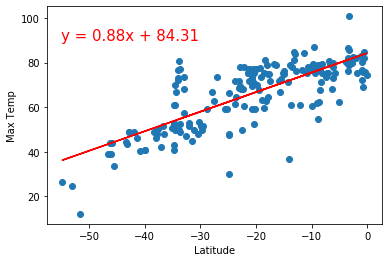

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between the Lattitude  and the Humidity  is weak : 0.1


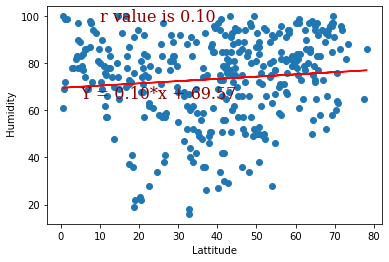

In [190]:
north_hemis_df = city_weather_clean_df[city_weather_clean_df["Lattitude"]>=0]
correlation_w_temp = round(st.pearsonr(north_hemis_df["Lattitude"],north_hemis_df["Humidity"])[0],2)
print(f"The correlation between the Lattitude  and the Humidity  is weak : {correlation_w_temp}")   
model = st.linregress(north_hemis_df["Lattitude"],north_hemis_df["Humidity"])
model_y_values = north_hemis_df["Lattitude"] * model[0] +  model[1]
plt.scatter(north_hemis_df["Lattitude"],north_hemis_df["Humidity"] )
plt.plot(north_hemis_df["Lattitude"],model_y_values, color="red")
plt.xlabel("Lattitude")
plt.ylabel(" Humidity")
plt.text(5,65,f"Y = {(model[0]):.2f}*x + {model[1]:.2f}",fontdict=font)
plt.text(10,98,f"r value is {(model[2]):.2f}",fontdict=font)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between the Lattitude  and the Humidity  is weak : 0.04


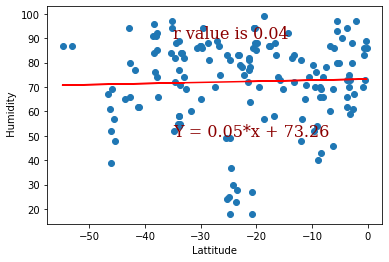

In [191]:
south_hemis_df = city_weather_clean_df[city_weather_clean_df["Lattitude"]<=0]
correlation_w_temp = round(st.pearsonr(south_hemis_df["Lattitude"],south_hemis_df["Humidity"])[0],2)
print(f"The correlation between the Lattitude  and the Humidity  is weak : {correlation_w_temp}")   
model = st.linregress(south_hemis_df["Lattitude"],south_hemis_df["Humidity"])
model_y_values = south_hemis_df["Lattitude"] * model[0] +  model[1]
plt.scatter(south_hemis_df["Lattitude"],south_hemis_df["Humidity"] )
plt.plot(south_hemis_df["Lattitude"],model_y_values, color="red")
plt.xlabel("Lattitude")
plt.ylabel(" Humidity")
plt.text(-35,50,f"Y = {(model[0]):.2f}*x + {model[1]:.2f}",fontdict=font)
plt.text(-35,90,f"r value is {(model[2]):.2f}",fontdict=font)
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between the Lattitude  and the Cloud Cover  is weak : 0.2


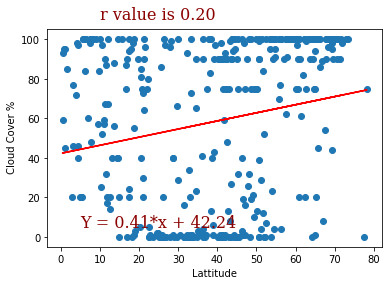

In [192]:
north_hemis_df = city_weather_clean_df[city_weather_clean_df["Lattitude"]>=0]
correlation_w_temp = round(st.pearsonr(north_hemis_df["Lattitude"],north_hemis_df["Cloud Cover"])[0],2)
print(f"The correlation between the Lattitude  and the Cloud Cover  is weak : {correlation_w_temp}")   
model = st.linregress(north_hemis_df["Lattitude"],north_hemis_df["Cloud Cover"])
model_y_values = north_hemis_df["Lattitude"] * model[0] +  model[1]
plt.scatter(north_hemis_df["Lattitude"],north_hemis_df["Cloud Cover"] )
plt.plot(north_hemis_df["Lattitude"],model_y_values, color="red")
plt.xlabel("Lattitude")
plt.ylabel(" Cloud Cover %")
plt.text(5,5,f"Y = {(model[0]):.2f}*x + {model[1]:.2f}",fontdict=font)
plt.text(10,110,f"r value is {(model[2]):.2f}",fontdict=font)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between the Lattitude  and the Cloud Cover  is weak : 0.06


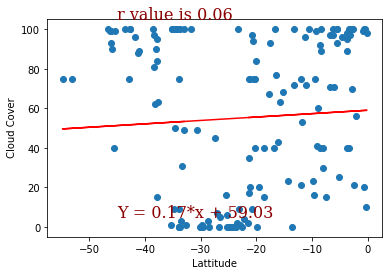

In [193]:
south_hemis_df = city_weather_clean_df[city_weather_clean_df["Lattitude"]<=0]
correlation_w_temp = round(st.pearsonr(south_hemis_df["Lattitude"],south_hemis_df["Cloud Cover"])[0],2)
print(f"The correlation between the Lattitude  and the Cloud Cover  is weak : {correlation_w_temp}")   
model = st.linregress(south_hemis_df["Lattitude"],south_hemis_df["Cloud Cover"])
model_y_values = south_hemis_df["Lattitude"] * model[0] +  model[1]
plt.scatter(south_hemis_df["Lattitude"],south_hemis_df["Cloud Cover"] )
plt.plot(south_hemis_df["Lattitude"],model_y_values, color="red")
plt.xlabel("Lattitude")
plt.ylabel(" Cloud Cover")
plt.text(-45,5,f"Y = {(model[0]):.2f}*x + {model[1]:.2f}",fontdict=font)
plt.text(-45,105,f"r value is {(model[2]):.2f}",fontdict=font)
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between the Lattitude  and the Wind Speed  is weak : 0.26


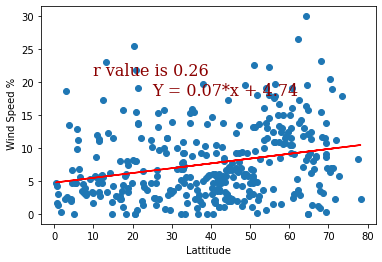

In [194]:
north_hemis_df = city_weather_clean_df[city_weather_clean_df["Lattitude"]>=0]
correlation_w_temp = round(st.pearsonr(north_hemis_df["Lattitude"],north_hemis_df["Wind Speed"])[0],2)
print(f"The correlation between the Lattitude  and the Wind Speed  is weak : {correlation_w_temp}")   
model = st.linregress(north_hemis_df["Lattitude"],north_hemis_df["Wind Speed"])
model_y_values = north_hemis_df["Lattitude"] * model[0] +  model[1]
plt.scatter(north_hemis_df["Lattitude"],north_hemis_df["Wind Speed"] )
plt.plot(north_hemis_df["Lattitude"],model_y_values, color="red")
plt.xlabel("Lattitude")
plt.ylabel(" Wind Speed %")
plt.text(25,18,f"Y = {(model[0]):.2f}*x + {model[1]:.2f}",fontdict=font)
plt.text(10,21,f"r value is {(model[2]):.2f}",fontdict=font)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between the Lattitude  and the Wind Speed  is weak : -0.22


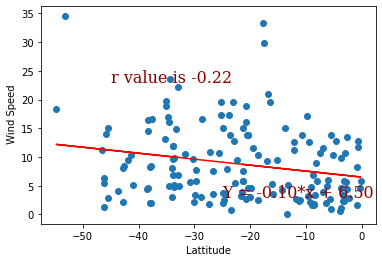

In [195]:
south_hemis_df = city_weather_clean_df[city_weather_clean_df["Lattitude"]<=0]
correlation_w_temp = round(st.pearsonr(south_hemis_df["Lattitude"],south_hemis_df["Wind Speed"])[0],2)
print(f"The correlation between the Lattitude  and the Wind Speed  is weak : {correlation_w_temp}")   
model = st.linregress(south_hemis_df["Lattitude"],south_hemis_df["Wind Speed"])
model_y_values = south_hemis_df["Lattitude"] * model[0] +  model[1]
plt.scatter(south_hemis_df["Lattitude"],south_hemis_df["Wind Speed"] )
plt.plot(south_hemis_df["Lattitude"],model_y_values, color="red")
plt.xlabel("Lattitude")
plt.ylabel(" Wind Speed")
plt.text(-25,3,f"Y = {(model[0]):.2f}*x + {model[1]:.2f}",fontdict=font)
plt.text(-45,23,f"r value is {(model[2]):.2f}",fontdict=font)
plt.show()

In [196]:
city_weather_clean_df.to_csv("City_Weather_Clean.csv")